### Student Information
Name: Adrian Tee Lian Guang

Student ID: 110062423

GitHub ID: adrtee

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

### FIRST PART: take home exercises (DM2021-Lab1-master)

In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

## Exercise 2 (take home):
X.query('category_name == "comp.graphics"')[::10][0:5]

text  category  \
0    From: sd345@city.ac.uk (Michael Collier) Subje...         1   
43   From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...         1   
76   From: sts@mfltd.co.uk (Steve Sherwood (x5543))...         1   
107  From: samson@prlhp1.prl.philips.co.uk (Mark Sa...         1   
172  From: thinman@netcom.com (Technically Sweet) S...         1   

     category_name  
0    comp.graphics  
43   comp.graphics  
76   comp.graphics  
107  comp.graphics  
172  comp.graphics

In [2]:
## Exercise 5 (take home)
# Answer here
# isnull() indicates whether values are missing, ie None or NaN in object arrays
# Thus, it gives True for indices 0 (np.nan), 1 (NaN) and 4 (None).
# however, for indices 2, 3, 6 there are data in text form ('NaN','None' for 2 and 3 respectively)
# and there is an empty string data for index 6. All these three are considered to have data present.

In [3]:
## Exercise 6 (take home):
# Answer here
# the data is randomly arranged by seeing at the random arrangement of index number
X_sample = X.sample(n=1000) #random state
X_sample[0:10]

text  category  \
337   From: Daniel.Prince@f129.n102.z1.calcom.socal....         2   
1509  From: ricky@watson.ibm.com (Rick Turner) Subje...         1   
1421  From: aron@tikal.ced.berkeley.edu (Aron Bonar)...         1   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
198   From: johnm@spudge.lonestar.org (John Munsch) ...         1   
188   From: cheinan@access.digex.com (Cheinan Marks)...         1   
1113  From: darice@yoyo.cc.monash.edu.au (Fred Rice)...         0   
1472  From: apodaca@spot.Colorado.EDU (mu'tafikah) S...         3   
2135  From: dmn@kepler.unh.edu (There's a seeker bor...         3   

               category_name  
337                  sci.med  
1509           comp.graphics  
1421           comp.graphics  
6     soc.religion.christian  
1              comp.graphics  
198            comp.graphics  
188            comp.graphics  
1113             alt.atheism  
1472  soc.religion.christian  
2135  soc.religion.christian

Text(0.5, 1.0, 'Category distribution')

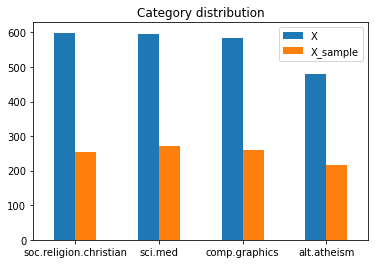

In [4]:
## Exercise 8 (take home):
import matplotlib.pyplot as plt
%matplotlib inline
X_array = []
X_array.append(X[X['category_name']=='soc.religion.christian'].category_name.value_counts()[0])
X_array.append(X[X['category_name']=='sci.med'].category_name.value_counts()[0])
X_array.append(X[X['category_name']=='comp.graphics'].category_name.value_counts()[0])
X_array.append(X[X['category_name']=='alt.atheism'].category_name.value_counts()[0])

X_sample_array = []
X_sample_array.append(X_sample[X_sample['category_name']=='soc.religion.christian'].category_name.value_counts()[0])
X_sample_array.append(X_sample[X_sample['category_name']=='sci.med'].category_name.value_counts()[0])
X_sample_array.append(X_sample[X_sample['category_name']=='comp.graphics'].category_name.value_counts()[0])
X_sample_array.append(X_sample[X_sample['category_name']=='alt.atheism'].category_name.value_counts()[0])
X_sample_array

plotdata = pd.DataFrame({
    "X":X_array,
    "X_sample":X_sample_array,
    }, 
    index=["soc.religion.christian", "sci.med", "comp.graphics", "alt.atheism"]
)
plotdata.plot(kind="bar", rot=0)
plt.title("Category distribution")

In [5]:
## Exercise 10 (take home):
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
count_vect.get_feature_names()[38]

'0100'

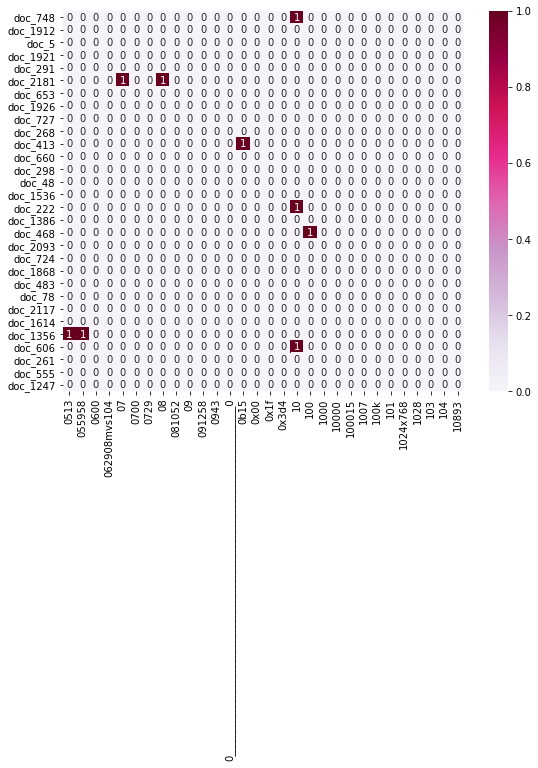

In [6]:
## Exercise 11 (take home):
# Sampling to one tenth of the original size, which is 200, to save computation power
import seaborn as sns
n = 200
Ex11_sample = X.sample(n)
Ex11_sample_counts = count_vect.fit_transform(Ex11_sample.text)
Ex11_plot_x = [str(i) for i in count_vect.get_feature_names()[20:50]]
Ex11_plot_y = ["doc_"+ str(i) for i in list(Ex11_sample.index)[20:50]] 
Ex11_plot_z = Ex11_sample_counts[20:50, 20:50].toarray()

df_todraw = pd.DataFrame(Ex11_plot_z, columns = Ex11_plot_x, index = Ex11_plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

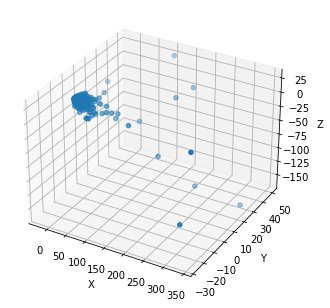

In [7]:
## Exercise 12 (take home):
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from sklearn.decomposition import PCA

fig = pyplot.figure()
ax = Axes3D(fig)
col = ['coral', 'blue', 'black', 'm']

Ex12_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
for c, category in zip(col, categories):
    xs = Ex12_reduced[X['category_name'] == category].T[0]
    ys = Ex12_reduced[X['category_name'] == category].T[1]
    zs = Ex12_reduced[X['category_name'] == category].T[2]

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter3D(xs, ys, zs)
pyplot.show()

In [8]:
## Exercise 13 (take home):
import plotly.graph_objects as go
import numpy as np

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names()[:300], y=term_frequencies[:300])],
    layout_title_text=""
)
fig.show()

In [9]:
## Exercise 14 (take home):
count_vect2 = CountVectorizer()
Ex14_sample = X.sample(n=5)
Ex14_sample_counts = count_vect2.fit_transform(Ex14_sample.text)

fig_sample = go.Figure(
    data=[go.Bar(x=count_vect2.get_feature_names(), y=term_frequencies)],
    layout_title_text=""
)
fig_sample.show()

In [10]:
##  Exercise 15 (take home):
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [11]:
## Exercise 16 (take home):
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

X2 = X
X2['category_name'] = mlb.transform(X['category']).tolist()
X2

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
0     [0, 1, 0, 0]  
1     [0, 1, 0, 0]  
2     [0, 0, 0, 1]  
3     [0, 0, 0, 1]  
4     [0, 0, 0, 1]  
...            ...  
2252  [0, 0, 1, 0]  
2253  [0, 0, 1, 0]  
2254  [0, 0, 1, 0]  
2255  [0, 0, 1, 0]  
2256  [0, 0, 1, 0]  

[2257 rows x 3 columns]

-----------------------------------------------------------------------------------------------------------------------------
### SECOND PART: Repeat same process for new dataset (Sentiment Labelled Sentences Data Set)

2.1 Data Preparation

In [12]:
# categories
categories = ['Sentence', 'Score']

# obtain the documents containing the categories provided
import pandas as pd
amazon_cells_labelled = pd.read_csv("sentiment labelled sentences\\sentiment labelled sentences\\amazon_cells_labelled.txt"
                    ,delimiter="\t", names=categories)
imdb_labelled = pd.read_csv("sentiment labelled sentences\\sentiment labelled sentences\\imdb_labelled.txt"
                    ,delimiter="\t", names=categories)
yelp_labelled = pd.read_csv("sentiment labelled sentences\\sentiment labelled sentences\\yelp_labelled.txt"
                    ,delimiter="\t", names=categories)

print("\n amazon_cells_labelled:\n", amazon_cells_labelled, "\n imdb_labelled:\n", imdb_labelled, "\n yelp_labelled:\n", yelp_labelled)


 amazon_cells_labelled:
                                               Sentence  Score
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

[1000 rows x 2 columns] 
 imdb_labelled:
                                               Sentence  Score
0    A very, very, very slow-moving, aimless movie ...      0
1    Not sure who was more lost - the flat characte...      0
2

In [13]:
# Length of each dataset
print("\n amazon_cells_labelled: ", len(amazon_cells_labelled), "\n imdb_labelled: ", len(imdb_labelled), "\n yelp_labelled: ", len(yelp_labelled))


 amazon_cells_labelled:  1000 
 imdb_labelled:  748 
 yelp_labelled:  1000


In [14]:
## Exercise 1: print out the text data for the first three samples
print(amazon_cells_labelled[0:3])

                                            Sentence  Score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1


2.2 Pandas Dataframe

In [15]:
# construct dataframe from a list and put the datasets into new dataframe
X = pd.DataFrame.from_records(amazon_cells_labelled)
Y = pd.DataFrame.from_records(imdb_labelled)
Z = pd.DataFrame.from_records(yelp_labelled)
X

Sentence  Score
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

[1000 rows x 2 columns]

In [16]:
# Length of X
print(len(X))

1000


In [17]:
# Print the first two data of X
X[0:2]

Sentence  Score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1

In [18]:
for t in X["Sentence"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [19]:
# print all Score
X.Score

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Score, Length: 1000, dtype: int64

In [20]:
# add new category to the dataframe
X['score_name'] = X.Score.apply(lambda x: "Negative" if x == 0 else "Positive")
Y['score_name'] = Y.Score.apply(lambda x: "Negative" if x == 0 else "Positive")
Z['score_name'] = Z.Score.apply(lambda x: "Negative" if x == 0 else "Positive")

In [21]:
X[0:10]

Sentence  Score score_name
0  So there is no way for me to plug it in here i...      0   Negative
1                        Good case, Excellent value.      1   Positive
2                             Great for the jawbone.      1   Positive
3  Tied to charger for conversations lasting more...      0   Negative
4                                  The mic is great.      1   Positive
5  I have to jiggle the plug to get it to line up...      0   Negative
6  If you have several dozen or several hundred c...      0   Negative
7        If you are Razr owner...you must have this!      1   Positive
8                Needless to say, I wasted my money.      0   Negative
9                   What a waste of money and time!.      0   Negative

In [22]:
# a simple query
X[0:10][["Sentence", "score_name"]]

Sentence score_name
0  So there is no way for me to plug it in here i...   Negative
1                        Good case, Excellent value.   Positive
2                             Great for the jawbone.   Positive
3  Tied to charger for conversations lasting more...   Negative
4                                  The mic is great.   Positive
5  I have to jiggle the plug to get it to line up...   Negative
6  If you have several dozen or several hundred c...   Negative
7        If you are Razr owner...you must have this!   Positive
8                Needless to say, I wasted my money.   Negative
9                   What a waste of money and time!.   Negative

In [23]:
# query the last 10 records
X[-10:]

Sentence  Score score_name
990  I'm really disappointed all I have now is a ch...      0   Negative
991                                Painful on the ear.      0   Negative
992                   Lasted one day and then blew up.      0   Negative
993                                      disappointed.      0   Negative
994                              Kind of flops around.      0   Negative
995  The screen does get smudged easily because it ...      0   Negative
996  What a piece of junk.. I lose more calls on th...      0   Negative
997                       Item Does Not Match Picture.      0   Negative
998  The only thing that disappoint me is the infra...      0   Negative
999  You can not answer calls with the unit, never ...      0   Negative

In [24]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

Sentence  Score
0   So there is no way for me to plug it in here i...      0
10                    And the sound quality is great.      1
20  I went on Motorola's website and followed all ...      0
30  This is a simple little phone to use, but the ...      0
40  It has a great camera thats 2MP, and the pics ...      1
50  Not loud enough and doesn't turn on like it sh...      0
60  Essentially you can forget Microsoft's tech su...      0
70                                  Mic Doesn't work.      0
80      I wear it everyday and it holds up very well.      1
90  For a product that costs as much as this one d...      0

In [25]:
# using loc (by label)
X.loc[::10, 'Sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: Sentence, dtype: object

In [26]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

Sentence  Score score_name
0   So there is no way for me to plug it in here i...      0   Negative
10                    And the sound quality is great.      1   Positive
20  I went on Motorola's website and followed all ...      0   Negative
30  This is a simple little phone to use, but the ...      0   Negative
40  It has a great camera thats 2MP, and the pics ...      1   Positive
50  Not loud enough and doesn't turn on like it sh...      0   Negative
60  Essentially you can forget Microsoft's tech su...      0   Negative
70                                  Mic Doesn't work.      0   Negative
80      I wear it everyday and it holds up very well.      1   Positive
90  For a product that costs as much as this one d...      0   Negative

In [27]:
# Exercise 2: Experiment with other querying techniques using pandas dataframes
X.query('score_name == "Negative"')[::10][0:5]

Sentence  Score score_name
0   So there is no way for me to plug it in here i...      0   Negative
20  I went on Motorola's website and followed all ...      0   Negative
37                        Poor Talk Time Performance.      0   Negative
60  Essentially you can forget Microsoft's tech su...      0   Negative
83                     The battery runs down quickly.      0   Negative

In [28]:
# Exercise 3: Try to fetch records belonging to the Negative score, and query every 10th record. Only show the first 5 records.
X.loc[lambda f: f.score_name == 'Negative'].iloc[::10,:][0:5]

Sentence  Score score_name
0   So there is no way for me to plug it in here i...      0   Negative
20  I went on Motorola's website and followed all ...      0   Negative
37                        Poor Talk Time Performance.      0   Negative
60  Essentially you can forget Microsoft's tech su...      0   Negative
83                     The battery runs down quickly.      0   Negative

2.3 Data Mining using Pandas

In [29]:
# Check for missing values
X.isnull()

Sentence  Score  score_name
0       False  False       False
1       False  False       False
2       False  False       False
3       False  False       False
4       False  False       False
..        ...    ...         ...
995     False  False       False
996     False  False       False
997     False  False       False
998     False  False       False
999     False  False       False

[1000 rows x 3 columns]

In [30]:
# Check for missing values
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence                               Score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           score_name  
0  The amoung of missing records is:   
1                                   0

In [31]:
#Exercise 4: try to calculate the missing values in every record instead of every column.
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
999    (The amoung of missing records is: , 0)
Length: 1000, dtype: object

In [32]:
# add a dummy series to test missing data
dummy_series = pd.Series(["dummy_record"], index=["Sentence"])
dummy_series

Sentence    dummy_record
dtype: object

In [33]:
# append the dummy record into X and confirm the append
X = X.append(dummy_series, ignore_index=True)
len(X)

1001

In [34]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence                               Score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   1   

                           score_name  
0  The amoung of missing records is:   
1                                   1

In [35]:
# remove missing data
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence                               Score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           score_name  
0  The amoung of missing records is:   
1                                   0

In [36]:
len(X)

1000

In [37]:
#Exercise 5: skipped - not applicable
# check for duplicated data
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [38]:
print(sum(X.duplicated()), sum(Y.duplicated()), sum(Z.duplicated()))

10 3 4


In [39]:
# remove duplicated data 
X.drop_duplicates(keep=False, inplace=True) 
Y.drop_duplicates(keep=False, inplace=True)
Z.drop_duplicates(keep=False, inplace=True)
print(len(X), len(Y), len(Z))
# Removed 2*10, 2*3 and 2*4 data for X, Y and Z data respectively

980 742 992


2.4 Data Preprocessing

In [40]:
# Sampling
X_sample = X.sample(n=100) 
Y_sample = Y.sample(n=100)
Z_sample = Z.sample(n=100)
print(len(X_sample), len(Y_sample), len(Z_sample))

100 100 100


In [41]:
X_sample[0:4]

Sentence  Score score_name
226  I usually don't like headbands but this one is...    1.0   Positive
150                             I Was Hoping for More.    0.0   Negative
347                                Good audio quality.    1.0   Positive
760                              Would not reccommend.    0.0   Negative

In [42]:
# Exercise 6:Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.
# the data is randomly arranged by seeing at the random arrangement of index number
X_sample[0:10]

Sentence  Score score_name
226  I usually don't like headbands but this one is...    1.0   Positive
150                             I Was Hoping for More.    0.0   Negative
347                                Good audio quality.    1.0   Positive
760                              Would not reccommend.    0.0   Negative
204                    Battery lasts only a few hours.    0.0   Negative
746             stay away from this store, be careful.    0.0   Negative
716  It quit working after I'd used it for about 18...    1.0   Positive
908  I can hear while I'm driving in the car, and u...    1.0   Positive
14   The design is very odd, as the ear "clip" is n...    0.0   Negative
108  The camera, although rated at an impressive 1....    0.0   Negative

Negative    494
Positive    486
Name: score_name, dtype: int64


<AxesSubplot:title={'center':'Score distribution for X'}>

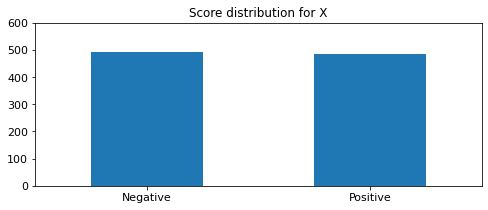

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
print(X.score_name.value_counts())

# plot barchart for X
X.score_name.value_counts().plot(kind = 'bar',
                                title = 'Score distribution for X',
                                ylim = [0, 600],        
                                rot = 0, fontsize = 11, figsize = (8,3))

Negative    57
Positive    43
Name: score_name, dtype: int64


<AxesSubplot:title={'center':'Score distribution for X_sample'}>

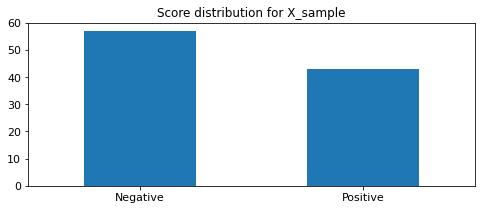

In [44]:
print(X_sample.score_name.value_counts())

# plot barchart for X_sample
X_sample.score_name.value_counts().plot(kind = 'bar',
                                title = 'Score distribution for X_sample',
                                ylim = [0, 60],        
                                rot = 0, fontsize = 11, figsize = (8,3))

Negative    57
Positive    43
Name: score_name, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

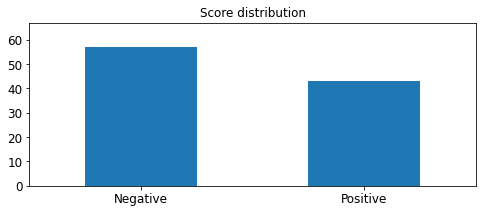

In [45]:
#Exercise 7: Automate maximum value for ylim instead of hard-coding it
# Answer here
upper_bound = max(X_sample.score_name.value_counts())+10
print(X_sample.score_name.value_counts())
# plot barchart for X_sample

X_sample.score_name.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',  
                                           ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

Text(0.5, 1.0, 'Category distribution')

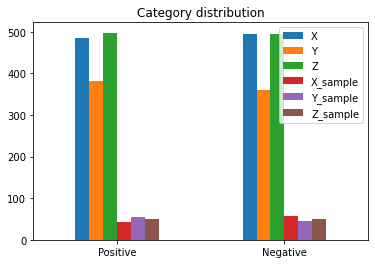

In [46]:
# Exercise 8: We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.
X_array = []
X_sample_array = []
X_array.append(X[X['score_name']=='Positive'].score_name.value_counts()[0])
X_array.append(X[X['score_name']=='Negative'].score_name.value_counts()[0])
X_sample_array.append(X_sample[X_sample['score_name']=='Positive'].score_name.value_counts()[0])
X_sample_array.append(X_sample[X_sample['score_name']=='Negative'].score_name.value_counts()[0])

Y_array = []
Y_sample_array = []
Y_array.append(Y[Y['score_name']=='Positive'].score_name.value_counts()[0])
Y_array.append(Y[Y['score_name']=='Negative'].score_name.value_counts()[0])
Y_sample_array.append(Y_sample[Y_sample['score_name']=='Positive'].score_name.value_counts()[0])
Y_sample_array.append(Y_sample[Y_sample['score_name']=='Negative'].score_name.value_counts()[0])

Z_array = []
Z_sample_array = []
Z_array.append(Z[Z['score_name']=='Positive'].score_name.value_counts()[0])
Z_array.append(Z[Z['score_name']=='Negative'].score_name.value_counts()[0])
Z_sample_array.append(Z_sample[Z_sample['score_name']=='Positive'].score_name.value_counts()[0])
Z_sample_array.append(Z_sample[Z_sample['score_name']=='Negative'].score_name.value_counts()[0])

plotdata = pd.DataFrame({
    "X":X_array,
    "Y":Y_array,
    "Z":Z_array,
    "X_sample":X_sample_array,
    "Y_sample":Y_sample_array,
    "Z_sample":Z_sample_array,
    }, 
    index=["Positive", "Negative"]
)
plotdata.plot(kind="bar", rot=0)
plt.title("Category distribution")

In [47]:
# Feature Creation
import nltk
X['unigrams'] = X['Sentence'].apply(lambda x: dmh.tokenize_text(x))
Y['unigrams'] = Y['Sentence'].apply(lambda x: dmh.tokenize_text(x))
Z['unigrams'] = Z['Sentence'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]

Sentence  Score score_name  \
0  So there is no way for me to plug it in here i...    0.0   Negative   
1                        Good case, Excellent value.    1.0   Positive   
2                             Great for the jawbone.    1.0   Positive   
3  Tied to charger for conversations lasting more...    0.0   Negative   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [48]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [49]:
# Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentence)
analyze = count_vect.build_analyzer()

#Exercise 9
analyze(" ".join(list(X[:1].Sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [50]:
# We can check the shape of this matrix by:
X_counts.shape

(980, 1845)

In [51]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['10', '100', '11', '12', '13', '15', '15g', '18', '20', '2000']

In [52]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [53]:
# Exercise 10 : N/A
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_18',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2160',
 'term_24',
 'term_2mp',
 'term_325',
 'term_350',
 'term_375',
 'term_3o',
 'term_42',
 'term_44']

In [54]:
plot_y = ["No. "+ str(i) for i in list(X.index)[0:20]]
plot_y

['No. 0',
 'No. 1',
 'No. 2',
 'No. 3',
 'No. 4',
 'No. 5',
 'No. 6',
 'No. 7',
 'No. 8',
 'No. 9',
 'No. 10',
 'No. 11',
 'No. 12',
 'No. 13',
 'No. 14',
 'No. 15',
 'No. 16',
 'No. 17',
 'No. 19',
 'No. 20']

In [55]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

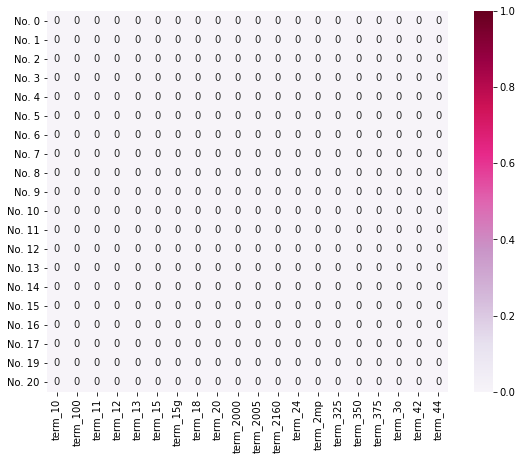

In [56]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

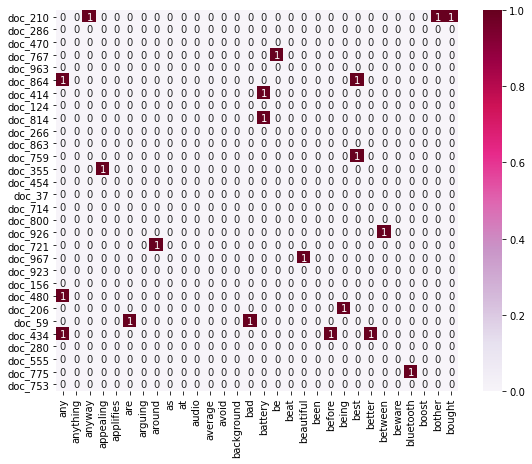

In [57]:
# Exercise 11: Sampling to one tenth of the original size, which is 100, and build Seaborn chart
n = 100
Ex11_sample = X.sample(n)
Ex11_sample_counts = count_vect.fit_transform(Ex11_sample.Sentence)
Ex11_plot_x = [str(i) for i in count_vect.get_feature_names()[20:50]]
Ex11_plot_y = ["doc_"+ str(i) for i in list(Ex11_sample.index)[20:50]] 
Ex11_plot_z = Ex11_sample_counts[20:50, 20:50].toarray()

df_todraw = pd.DataFrame(Ex11_plot_z, columns = Ex11_plot_x, index = Ex11_plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [58]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_counts.shape, X_reduced.shape)

(980, 1845) (980, 2)


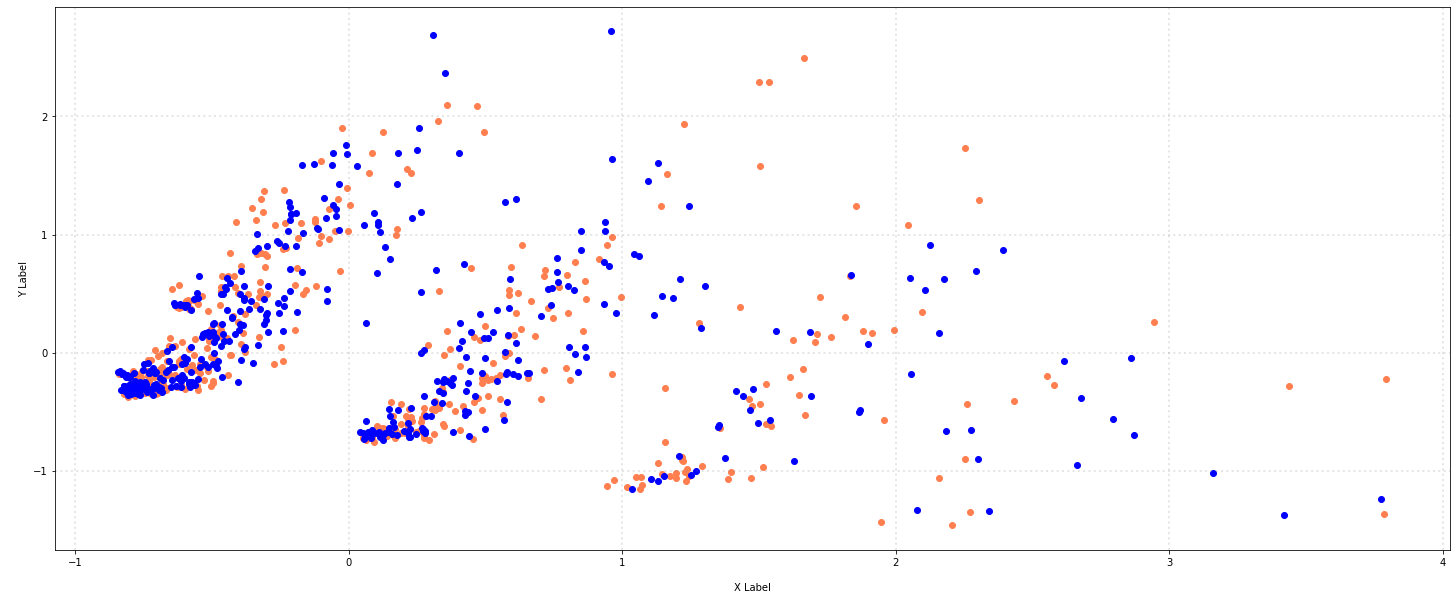

In [59]:
col = ['coral', 'blue']
scores=['Negative', 'Positive']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, scores):
    xs = X_reduced[X['score_name'] == score].T[0]
    ys = X_reduced[X['score_name'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

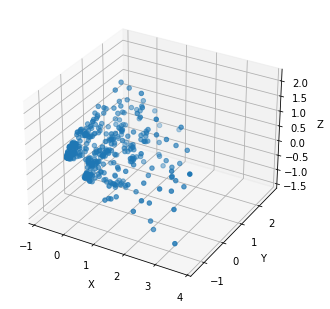

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

fig = pyplot.figure()
ax = Axes3D(fig)

Ex12_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
for c, score in zip(col, scores):
    xs = Ex12_reduced[X['score_name'] == score].T[0]
    ys = Ex12_reduced[X['score_name'] == score].T[1]
    zs = Ex12_reduced[X['score_name'] == score].T[2]

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter3D(xs, ys, zs)
pyplot.show()

In [61]:
#Atrribute Transformation / Aggregation
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

4

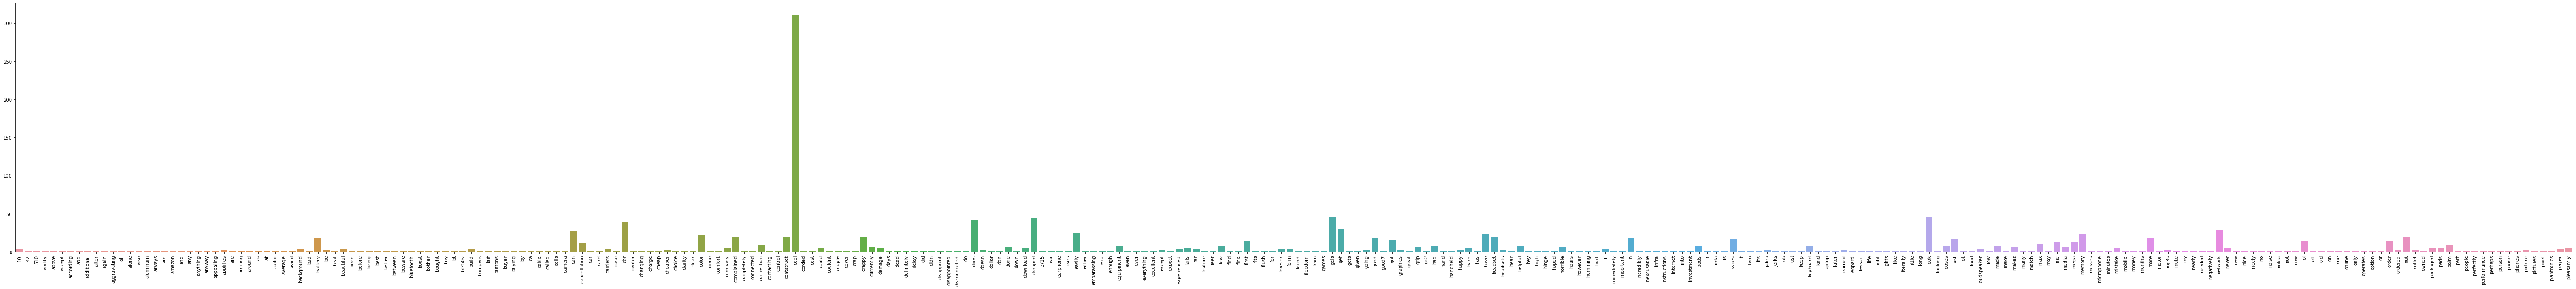

In [62]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [63]:
# Exercise 13: plotly
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names()[:300], y=term_frequencies[:300])],
    layout_title_text=""
)
fig.show()

In [64]:
# Exercise 14: reduce the number of terms to visualize 
count_vect2 = CountVectorizer()
Ex14_sample = X.sample(n=50)
Ex14_sample_counts = count_vect2.fit_transform(Ex14_sample.Sentence)

fig_sample = go.Figure(
    data=[go.Bar(x=count_vect2.get_feature_names(), y=term_frequencies)],
    layout_title_text=""
)
fig_sample.show()

In [65]:
# Exercise 15: sort the terms
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

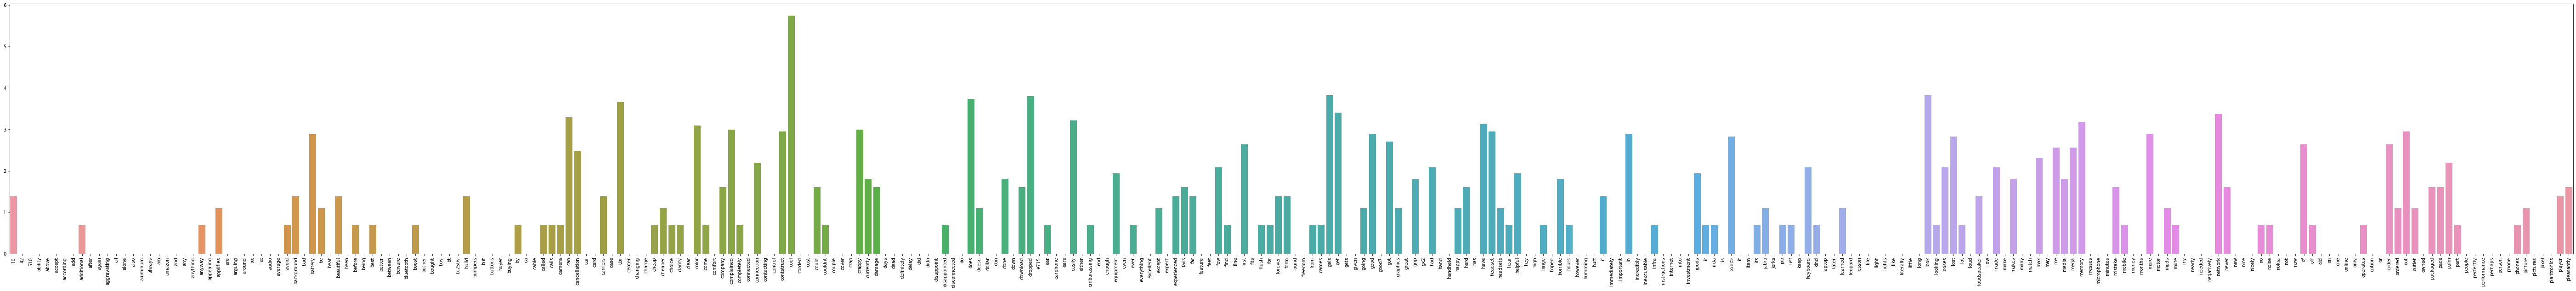

In [66]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [67]:
# Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.Score)
X['bin_Score'] = mlb.transform(X['Score']).tolist()
X[0:9]
# Exercise 16 (take home): N/A

Sentence  Score score_name  \
0  So there is no way for me to plug it in here i...    0.0   Negative   
1                        Good case, Excellent value.    1.0   Positive   
2                             Great for the jawbone.    1.0   Positive   
3  Tied to charger for conversations lasting more...    0.0   Negative   
4                                  The mic is great.    1.0   Positive   
5  I have to jiggle the plug to get it to line up...    0.0   Negative   
6  If you have several dozen or several hundred c...    0.0   Negative   
7        If you are Razr owner...you must have this!    1.0   Positive   
8                Needless to say, I wasted my money.    0.0   Negative   

                                            unigrams bin_Score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]

2.5 Data Exploration

In [68]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['Sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['Sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['Sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [69]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


----------------------------------------------------------------------------------------------------------------------------
### THIRD PART: Tasks on New Dataset
- 3.1: Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
- 3.2: Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .
- 3.3: Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

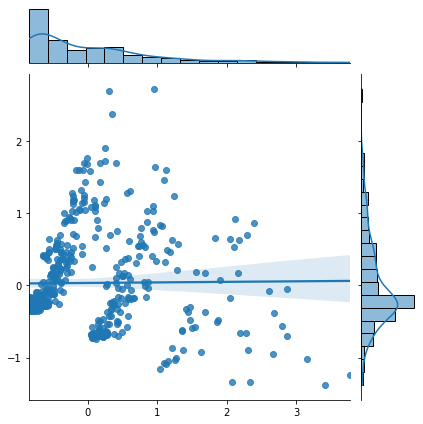

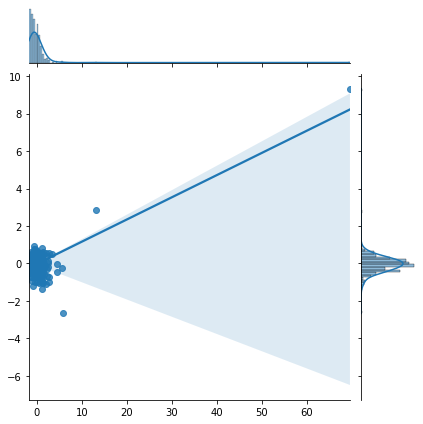

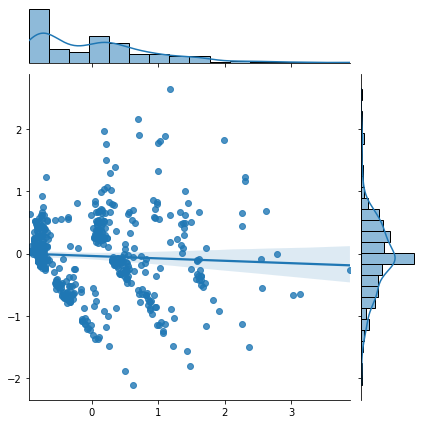

In [71]:
# 3.1: Generate meaningful new data visualizations.
Y_counts = count_vect.fit_transform(Y.Sentence)
Z_counts = count_vect.fit_transform(Z.Sentence)
Y_reduced = PCA(n_components = 2).fit_transform(Y_counts.toarray())
Z_reduced = PCA(n_components = 2).fit_transform(Z_counts.toarray())
for c, score in zip(col, scores):
    xs2 = Y_reduced[Y['score_name'] == score].T[0]
    ys2 = Y_reduced[Y['score_name'] == score].T[1]
    xs3 = Z_reduced[Z['score_name'] == score].T[0]
    ys3 = Z_reduced[Z['score_name'] == score].T[1]
sns.jointplot(x=xs, y=ys, kind='reg')
sns.jointplot(x=xs2, y=ys2, kind='reg')
sns.jointplot(x=xs3, y=ys3, kind='reg')
plt.show()

In [72]:
# 3.2: Generate TF-IDF features from the tokens of each text.
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)

# Retrieve the word list and frequency for dataset X, Y and Z
# X:
count_vectX = CountVectorizer()
X_counts = count_vectX.fit_transform(X.Sentence)
xn=count_vectX.get_feature_names()
xf = []
for j in range(0,X_counts.shape[1]):
    xf.append(sum(X_counts[:,j].toarray()))
xf = np.asarray(X_counts.sum(axis=0))

# Y:
count_vectY = CountVectorizer()
Y_counts = count_vectY.fit_transform(Y.Sentence)
yn=count_vectY.get_feature_names()
yf = []
for j in range(0,Y_counts.shape[1]):
    yf.append(sum(Y_counts[:,j].toarray()))
yf = np.asarray(Y_counts.sum(axis=0))

# Z:
count_vectZ = CountVectorizer()
Z_counts = count_vectZ.fit_transform(Z.Sentence)
zn=count_vectZ.get_feature_names()
zf = []
for j in range(0,Z_counts.shape[1]):
    zf.append(sum(Z_counts[:,j].toarray()))
zf = np.asarray(Z_counts.sum(axis=0))

# Retrieve TF-IDF features for dataset X, Y and Z
transformer = TfidfTransformer(smooth_idf=False)
tfidf_X = transformer.fit_transform(xf)
tfidf_Y = transformer.fit_transform(yf)
tfidf_Z = transformer.fit_transform(zf)

In [73]:
for i in range(len(X.Sentence)):
    print(xn[i], "\t", tfidf_X.toarray()[0,1])

10 	 0.0010849573964853052
100 	 0.0010849573964853052
11 	 0.0010849573964853052
12 	 0.0010849573964853052
13 	 0.0010849573964853052
15 	 0.0010849573964853052
15g 	 0.0010849573964853052
18 	 0.0010849573964853052
20 	 0.0010849573964853052
2000 	 0.0010849573964853052
2005 	 0.0010849573964853052
2160 	 0.0010849573964853052
24 	 0.0010849573964853052
2mp 	 0.0010849573964853052
325 	 0.0010849573964853052
350 	 0.0010849573964853052
375 	 0.0010849573964853052
3o 	 0.0010849573964853052
42 	 0.0010849573964853052
44 	 0.0010849573964853052
45 	 0.0010849573964853052
4s 	 0.0010849573964853052
50 	 0.0010849573964853052
5020 	 0.0010849573964853052
510 	 0.0010849573964853052
5320 	 0.0010849573964853052
680 	 0.0010849573964853052
700w 	 0.0010849573964853052
8125 	 0.0010849573964853052
8525 	 0.0010849573964853052
8530 	 0.0010849573964853052
abhor 	 0.0010849573964853052
ability 	 0.0010849573964853052
able 	 0.0010849573964853052
abound 	 0.0010849573964853052
about 	 0.00108

clips 	 0.0010849573964853052
clock 	 0.0010849573964853052
colleague 	 0.0010849573964853052
color 	 0.0010849573964853052
colored 	 0.0010849573964853052
colors 	 0.0010849573964853052
combination 	 0.0010849573964853052
come 	 0.0010849573964853052
comes 	 0.0010849573964853052
comfort 	 0.0010849573964853052
comfortable 	 0.0010849573964853052
comfortably 	 0.0010849573964853052
comfortible 	 0.0010849573964853052
coming 	 0.0010849573964853052
comments 	 0.0010849573964853052
commercials 	 0.0010849573964853052
communicate 	 0.0010849573964853052
communication 	 0.0010849573964853052
communications 	 0.0010849573964853052
commuter 	 0.0010849573964853052
company 	 0.0010849573964853052
comparably 	 0.0010849573964853052
compared 	 0.0010849573964853052
compete 	 0.0010849573964853052
competitors 	 0.0010849573964853052
complain 	 0.0010849573964853052
complained 	 0.0010849573964853052
complaint 	 0.0010849573964853052
complaints 	 0.0010849573964853052
completely 	 0.001084957396

feels 	 0.0010849573964853052
feet 	 0.0010849573964853052
felt 	 0.0010849573964853052
few 	 0.0010849573964853052
fi 	 0.0010849573964853052
figure 	 0.0010849573964853052
file 	 0.0010849573964853052
finally 	 0.0010849573964853052
find 	 0.0010849573964853052
finds 	 0.0010849573964853052
fine 	 0.0010849573964853052
fingers 	 0.0010849573964853052
finished 	 0.0010849573964853052
fire 	 0.0010849573964853052
first 	 0.0010849573964853052
fit 	 0.0010849573964853052
fits 	 0.0010849573964853052
five 	 0.0010849573964853052
fixes 	 0.0010849573964853052
flash 	 0.0010849573964853052
flaw 	 0.0010849573964853052
flawed 	 0.0010849573964853052
flawless 	 0.0010849573964853052
flawlessly 	 0.0010849573964853052
flaws 	 0.0010849573964853052
flimsy 	 0.0010849573964853052
flip 	 0.0010849573964853052
flipphones 	 0.0010849573964853052
fliptop 	 0.0010849573964853052
floor 	 0.0010849573964853052
floppy 	 0.0010849573964853052
flops 	 0.0010849573964853052
flush 	 0.0010849573964853052
f

line 	 0.0010849573964853052
linked 	 0.0010849573964853052
linking 	 0.0010849573964853052
linksys 	 0.0010849573964853052
listener 	 0.0010849573964853052
listening 	 0.0010849573964853052
lit 	 0.0010849573964853052
literally 	 0.0010849573964853052
little 	 0.0010849573964853052
living 	 0.0010849573964853052
ll 	 0.0010849573964853052
loads 	 0.0010849573964853052
lock 	 0.0010849573964853052
locked 	 0.0010849573964853052
locks 	 0.0010849573964853052
logitech 	 0.0010849573964853052
long 	 0.0010849573964853052
longer 	 0.0010849573964853052
look 	 0.0010849573964853052
looking 	 0.0010849573964853052
looks 	 0.0010849573964853052
loop 	 0.0010849573964853052
loops 	 0.0010849573964853052
loose 	 0.0010849573964853052
looses 	 0.0010849573964853052
los 	 0.0010849573964853052
lose 	 0.0010849573964853052
lost 	 0.0010849573964853052
lot 	 0.0010849573964853052
lots 	 0.0010849573964853052
loud 	 0.0010849573964853052
louder 	 0.0010849573964853052
loudest 	 0.0010849573964853052

In [74]:
for i in range(len(Y.Sentence)):
    print(yn[i], "\t", tfidf_Y.toarray()[0,1])

10 	 0.0007473058909748353
12 	 0.0007473058909748353
13 	 0.0007473058909748353
15 	 0.0007473058909748353
15pm 	 0.0007473058909748353
17 	 0.0007473058909748353
18th 	 0.0007473058909748353
1928 	 0.0007473058909748353
1947 	 0.0007473058909748353
1948 	 0.0007473058909748353
1949 	 0.0007473058909748353
1971 	 0.0007473058909748353
1973 	 0.0007473058909748353
1980 	 0.0007473058909748353
1986 	 0.0007473058909748353
1995 	 0.0007473058909748353
1998 	 0.0007473058909748353
20 	 0.0007473058909748353
2005 	 0.0007473058909748353
2006 	 0.0007473058909748353
20th 	 0.0007473058909748353
25 	 0.0007473058909748353
30 	 0.0007473058909748353
40 	 0.0007473058909748353
50 	 0.0007473058909748353
54 	 0.0007473058909748353
70 	 0.0007473058909748353
70000 	 0.0007473058909748353
70s 	 0.0007473058909748353
80 	 0.0007473058909748353
80s 	 0.0007473058909748353
8pm 	 0.0007473058909748353
90 	 0.0007473058909748353
95 	 0.0007473058909748353
aailiyah 	 0.0007473058909748353
abandoned 	 0

blake 	 0.0007473058909748353
bland 	 0.0007473058909748353
blandly 	 0.0007473058909748353
blare 	 0.0007473058909748353
blatant 	 0.0007473058909748353
blew 	 0.0007473058909748353
blood 	 0.0007473058909748353
blown 	 0.0007473058909748353
blue 	 0.0007473058909748353
blush 	 0.0007473058909748353
boasts 	 0.0007473058909748353
bob 	 0.0007473058909748353
body 	 0.0007473058909748353
bohemian 	 0.0007473058909748353
boiling 	 0.0007473058909748353
bold 	 0.0007473058909748353
bombardments 	 0.0007473058909748353
bond 	 0.0007473058909748353
bonding 	 0.0007473058909748353
bonus 	 0.0007473058909748353
bonuses 	 0.0007473058909748353
boobs 	 0.0007473058909748353
boogeyman 	 0.0007473058909748353
book 	 0.0007473058909748353
boost 	 0.0007473058909748353
bop 	 0.0007473058909748353
bordered 	 0.0007473058909748353
borderlines 	 0.0007473058909748353
borders 	 0.0007473058909748353
bore 	 0.0007473058909748353
bored 	 0.0007473058909748353
boring 	 0.0007473058909748353
borrowed 	 0.0

convey 	 0.0007473058909748353
convince 	 0.0007473058909748353
convincing 	 0.0007473058909748353
convoluted 	 0.0007473058909748353
cool 	 0.0007473058909748353
coppola 	 0.0007473058909748353
cords 	 0.0007473058909748353
core 	 0.0007473058909748353
corn 	 0.0007473058909748353
corny 	 0.0007473058909748353
correct 	 0.0007473058909748353
cost 	 0.0007473058909748353
costs 	 0.0007473058909748353
costumes 	 0.0007473058909748353
cotton 	 0.0007473058909748353
could 	 0.0007473058909748353
couldn 	 0.0007473058909748353
couple 	 0.0007473058909748353
course 	 0.0007473058909748353
court 	 0.0007473058909748353
courtroom 	 0.0007473058909748353
cover 	 0.0007473058909748353
cowardice 	 0.0007473058909748353
cox 	 0.0007473058909748353
crackles 	 0.0007473058909748353
crafted 	 0.0007473058909748353
crap 	 0.0007473058909748353
crash 	 0.0007473058909748353
crashed 	 0.0007473058909748353
crayon 	 0.0007473058909748353
crayons 	 0.0007473058909748353
crazy 	 0.0007473058909748353
crea

In [75]:
for i in range(len(Z.Sentence)):
    print(zn[i], "\t", tfidf_Z.toarray()[0,1])

00 	 0.005134891254221689
10 	 0.005134891254221689
100 	 0.005134891254221689
11 	 0.005134891254221689
12 	 0.005134891254221689
15 	 0.005134891254221689
17 	 0.005134891254221689
1979 	 0.005134891254221689
20 	 0.005134891254221689
2007 	 0.005134891254221689
23 	 0.005134891254221689
30 	 0.005134891254221689
30s 	 0.005134891254221689
35 	 0.005134891254221689
40 	 0.005134891254221689
40min 	 0.005134891254221689
45 	 0.005134891254221689
4ths 	 0.005134891254221689
5lb 	 0.005134891254221689
70 	 0.005134891254221689
85 	 0.005134891254221689
90 	 0.005134891254221689
99 	 0.005134891254221689
about 	 0.005134891254221689
above 	 0.005134891254221689
absolute 	 0.005134891254221689
absolutely 	 0.005134891254221689
absolutley 	 0.005134891254221689
accident 	 0.005134891254221689
accommodations 	 0.005134891254221689
accomodate 	 0.005134891254221689
accordingly 	 0.005134891254221689
accountant 	 0.005134891254221689
ache 	 0.005134891254221689
acknowledged 	 0.00513489125422

caterpillar 	 0.005134891254221689
caught 	 0.005134891254221689
cause 	 0.005134891254221689
cavier 	 0.005134891254221689
certainly 	 0.005134891254221689
chai 	 0.005134891254221689
chains 	 0.005134891254221689
changing 	 0.005134891254221689
char 	 0.005134891254221689
charcoal 	 0.005134891254221689
charge 	 0.005134891254221689
charged 	 0.005134891254221689
charming 	 0.005134891254221689
cheap 	 0.005134891254221689
cheated 	 0.005134891254221689
check 	 0.005134891254221689
checked 	 0.005134891254221689
cheek 	 0.005134891254221689
cheese 	 0.005134891254221689
cheeseburger 	 0.005134891254221689
cheesecurds 	 0.005134891254221689
chef 	 0.005134891254221689
chefs 	 0.005134891254221689
chewy 	 0.005134891254221689
chicken 	 0.005134891254221689
chickens 	 0.005134891254221689
chinese 	 0.005134891254221689
chip 	 0.005134891254221689
chipolte 	 0.005134891254221689
chipotle 	 0.005134891254221689
chips 	 0.005134891254221689
chocolate 	 0.005134891254221689
choose 	 0.00513

event 	 0.005134891254221689
events 	 0.005134891254221689
ever 	 0.005134891254221689
every 	 0.005134891254221689
everyone 	 0.005134891254221689
everything 	 0.005134891254221689
everywhere 	 0.005134891254221689
exactly 	 0.005134891254221689
excalibur 	 0.005134891254221689
exceeding 	 0.005134891254221689
excellent 	 0.005134891254221689
exceptional 	 0.005134891254221689
excuse 	 0.005134891254221689
expanded 	 0.005134891254221689
expect 	 0.005134891254221689
expectations 	 0.005134891254221689
expected 	 0.005134891254221689
expensive 	 0.005134891254221689
experience 	 0.005134891254221689
experienced 	 0.005134891254221689
experiencing 	 0.005134891254221689
expert 	 0.005134891254221689
exquisite 	 0.005134891254221689
extensive 	 0.005134891254221689
extra 	 0.005134891254221689
extraordinary 	 0.005134891254221689
extremely 	 0.005134891254221689
eyed 	 0.005134891254221689
eyes 	 0.005134891254221689
fabulous 	 0.005134891254221689
fact 	 0.005134891254221689
fail 	 0.0

indian 	 0.005134891254221689
indicate 	 0.005134891254221689
indoor 	 0.005134891254221689
industry 	 0.005134891254221689
inexpensive 	 0.005134891254221689
inflate 	 0.005134891254221689
informative 	 0.005134891254221689
ingredients 	 0.005134891254221689
insanely 	 0.005134891254221689
inside 	 0.005134891254221689
inspired 	 0.005134891254221689
instantly 	 0.005134891254221689
instead 	 0.005134891254221689
insulted 	 0.005134891254221689
insults 	 0.005134891254221689
interesting 	 0.005134891254221689
interior 	 0.005134891254221689
into 	 0.005134891254221689
inviting 	 0.005134891254221689
ironman 	 0.005134891254221689
is 	 0.005134891254221689
isn 	 0.005134891254221689
it 	 0.005134891254221689
italian 	 0.005134891254221689
item 	 0.005134891254221689
its 	 0.005134891254221689
itself 	 0.005134891254221689
jalapeno 	 0.005134891254221689
jamaican 	 0.005134891254221689
japanese 	 0.005134891254221689
jeff 	 0.005134891254221689
jenni 	 0.005134891254221689
jerk 	 0.0051

In [76]:
# 3.3: Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. 
# Use both the TF-IDF features and word frequency features to build two seperate classifiers
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

X = pd.DataFrame.from_records(amazon_cells_labelled)
Y = pd.DataFrame.from_records(imdb_labelled)
Z = pd.DataFrame.from_records(yelp_labelled)

In [77]:
# For word frequency features
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Merge three dataset and Split Sentence and Score
corpus = []
for i in range(len(X)):
    text = re.sub('[^a-zA-Z]', '', X['Sentence'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = ''.join(text)
    corpus.append(text)
for i in range(len(Y)):
    text = re.sub('[^a-zA-Z]', '', Y['Sentence'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = ''.join(text)
    corpus.append(text)
for i in range(len(Z)):
    text = re.sub('[^a-zA-Z]', '', Z['Sentence'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = ''.join(text)
    corpus.append(text)

count_vect = CountVectorizer()
x = count_vect.fit_transform(corpus).toarray()
y = [*X.iloc[:, 1].values, *Y.iloc[:, 1].values, *Z.iloc[:, 1].values]

# splitting the data set into training set and test set
x_train, x_test, y_train, y_test = train_test_split(
           x, y, test_size = 0.25, random_state = 0)

# fitting naive bayes to the training set
classifier = GaussianNB();
classifier.fit(x_train, y_train)
 
# predicting test set results
y_pred = classifier.predict(x_test)

# Get Accuracy
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Postive','Negative')), categories = ['Postive','Negative'])
pred = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Postive','Negative')), categories = ['Postive','Negative'])
accuracy = np.mean(pred == true)*100
print("Accuracy = "+str(accuracy)+"%")


Accuracy = 51.52838427947598%


In [78]:
# for TF-IDF features 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# fitting naive bayes to the training set
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])
text_clf = text_clf.fit(X.Sentence, X.Score)

# predicting test set results
predicted = text_clf.predict(Y.Sentence)

# Get Accuracy
accuracy = np.mean(predicted == Y.Score)*100
print("Accuracy = "+str(accuracy)+"%")

Accuracy = 69.78609625668449%


Comment the difference:
- The input for the word frequency and TFIDF feature are different. The former has combined dataset for both training and testing; while the latter has X dataset (amazon_cells_labelled) for training and Y dataset (imdb_labelled) for testing.
- The Naive Bayes model for word frequency is Gaussian; while for TF-ISF is Multinomial.
- The output of TF-IDF (69.8%) is higher than word frequency (51.5%). It may be due to different Naive Bayes model is applied on them. 


-----------------------------------------------------------------------------------------
### FOURTH PART: There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 

Inefficiency: 
- In Exercise 7, finding upper_bound is not necessary because if ylim is not specified, the plot would automatically get the maximum value. 
- In Exercise 3, the question can be answered in simpler way as follows: 
- X[X['category_name']=='comp.graphics'][::10][0:5]

Improvement on data preprocessing:
The data in the preprocessing stage such as the Term Frequency can be normalised. Normalisation is the convertion the data into another format boost data processing effectiveness. The advantage of data mining normalization are:

- Algorithms can be applied easier
- Ensure effective and efficient algorithm
- Converted data is more understandable
- Faster data extraction from databases

In our case, Min-Max normalization can be applied to Term Frequency. This means that we scale the data from 0 to 1. Thus, there won't be any large numbers, and the concised data can be used in decision-making process immediately.